Ταξινόμησης όγκων από κύτταρα μαστών σε καλοήθεις ή μη όγκους. Θα χρησιμοποιήθει το Breast Cancer Wisconsin (Diagnostic) Dataset του UCI Machine Learning Repository.

In [91]:
# Φόρτωση του Συνόλου Δεδομένων
%pip install seaborn
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support

# Φόρτωση του συνόλου δεδομένων
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

Διάβασμα του dataset και μετατροπή σε dataframe.

In [92]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df["target"] = cancer.target

Εμφάνηση των πρώτων γραμμών του συνόλου δεδομένων.

In [93]:
# Εμφάνισε τις πρώτες 4 γραμμές του dataframe
print( df.head(4) )

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2        

Αν υπάρχουν κενές τιμές τις διαγράφοθμε.

In [94]:
df.dropna()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Διαχωρίσμός του σύνολο δεδομένων σε υποσύνολο χαρακτηριστικών Χ και σε υποσύνολο στόχων y.

In [95]:
x = df.drop(columns=['target'])  # Διατηρούμε μόνο τα χαρακτηριστικά
y = df['target']  # Στόχος (κακοήθης ή καλοήθης)

Κανονικοποίηση του dataset πριν το διαχωρισμό σε training και test sets.

In [96]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Διαχωρισμός του σύνολου δεδομένων σε Training & Test Sets.

In [97]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=78)

Αναπαράσταση της κατανομή της εξαρτημένης μεταβλητής (target) του training dataset.

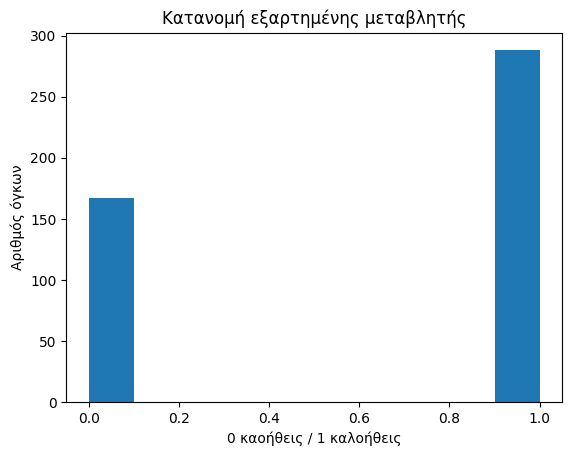

In [98]:
plt.hist(y_train)
plt.xlabel('0 καοήθεις / 1 καλοήθεις')
plt.ylabel('Αριθμός όγκων')
plt.title("Κατανομή εξαρτημένης μεταβλητής")
plt.show()

Είναι εμφανές ότι το dataset είναι biased ως προς την κατηγορία 1 (καλοήθεις). Μια λύση θα ήταν να διαγράψουμε τυχαία δείγματα από την κατηγορία 1 (καλοήθης), ώστε να έχουμε ίσες ποσότητες (Downsampling). Όμως υπάρχει το μειονεκτήματα ότι χάνουμε πληροφορία. Εναλακτικά μπορούμε να χτησιμοποιήσουμε κάποιο βάρος στην μειωνεκτική κλάση (Βολικό για logistic regression). Καθώς για την εκπαίδευση θα χρησιμοποιήσουμε τα μοντέλα για κατηγοριοποίηση:
k-Nearest Neighbors, GaussianNB και Logistic Regression θα κάνουμε Downsampling που είναι απλό και γρήγορο.

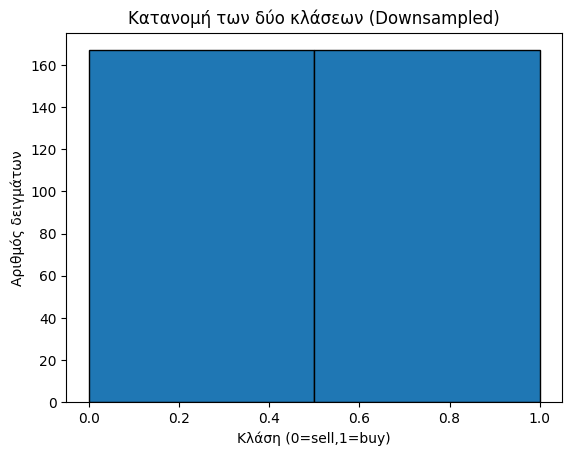

In [99]:
from sklearn.utils import resample

# Δημιουργία DataFrame από X_train
X_train_df = pd.DataFrame(X_train)

# Δημιουργία DataFrame από X_train
y_train_df = pd.DataFrame(y_train)

# Συγχώνευση σε ένα DataFrame
train_df = pd.concat([X_train_df.reset_index(drop=True),
                      y_train_df.reset_index(drop=True)], axis=1)


df_majority = train_df[train_df['target'] == 1] # καλοήθης
df_minority = train_df[train_df['target'] == 0] # κακοήθης

# Downsampling το δείγμα σε πλειοψηφία (καλοήθης)
df_maj_downsampled = resample(df_majority,n_samples=len(df_minority),random_state=42)

# ένωση των δειγμάτων σε minority και του νέου downsized dataset
balanced_df = pd.concat([df_minority, df_maj_downsampled])
balanced_df.columns = list(x.columns) + ['target']

y_train_balanced = balanced_df['target']
X_train_balanced = balanced_df.drop(columns=['target'])

# Visualization
plt.hist(y_train_balanced, bins=2, edgecolor='black')
plt.xlabel('Κλάση (0=sell,1=buy)')
plt.ylabel('Αριθμός δειγμάτων')
plt.title("Κατανομή των δύο κλάσεων (Downsampled)")
plt.show()


#### Ανάλυση Δεδομένων
Ανάλυση των χαρακτηριστικών του συνόλου δεδομένων για train με χρήση boxplots.

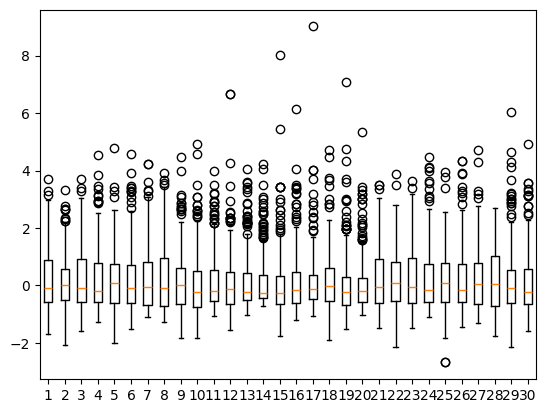

In [100]:
# Όλα τα χαρακτηριστικά με boxplots μαζί
plt.boxplot(X_train_balanced)
plt.show()

Για τον έλεγχο συσχετίσεων μεταξύ των χαρακτηριστικών, χρησιμοποιήστε heatmap. Αφαιρούμε τα χαρακτηριστικά με μεγάλη συσχέτιση (>0.9)

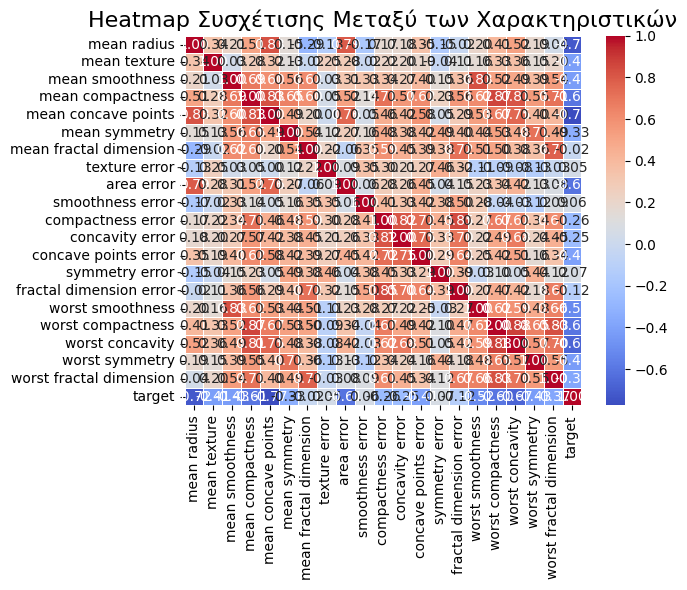

In [101]:
corr_matrix = balanced_df.drop(columns=['worst concave points','mean perimeter','mean area','worst perimeter','worst area','worst texture','worst area','mean concavity','worst radius','radius error','perimeter error']).corr()

# Δημιουργία Heatmap to correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Ρυθμίσεις για τον τίτλο
plt.title('Heatmap Συσχέτισης Μεταξύ των Χαρακτηριστικών', fontsize=16)
plt.show()

#### Εκπαίδευση συνόλου δεδομένων
Για την εκπαίδευση θα χρησιμοποιήσετε τα ακόλουθα 3 μοντέλα για κατηγοριοποίηση:
- [k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)
- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)


In [102]:
# Λίστα για αποθήκευση των μετρικών
results = []

# α,β: Εκπαίδευση και Αξιολόγηση του k-Nearest Neighbors
k_values = [3, 5]
for k in k_values:
    # Initialize classifier:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier:
    knn.fit(X_train_balanced, y_train_balanced)

    # Make predictions with the classifier:
    pred = knn.predict(X_test)

    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
    accuracy = accuracy_score(y_test, pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, pred, average='weighted')
    results.append(["KNN", f"n_neighbors={k}", accuracy, precision, recall, f1])




# α,β: Εκπαίδευση και Αξιολόγηση του Naive Bayes
var_values = [1e-9, 1]
for var in var_values:
    # Initialize classifier:
    gnb = GaussianNB(var_smoothing=var)

    # Train the classifier:
    model = gnb.fit(X_train_balanced, y_train_balanced)

    # Make predictions with the classifier:
    predictive_labels = gnb.predict(X_test)

    # print("Prediction ", predictive_labels)
    # print("Test set", y_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictive_labels))
    accuracy = accuracy_score(y_test, predictive_labels)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictive_labels, average='weighted')
    results.append(["Naive Bayes", f"var_smoothing={var}", accuracy, precision, recall, f1])




# α,β: Εκπαίδευση και Αξιολόγηση του Logistic Regression
penalty_values = [None, 'l2']
for penalty in penalty_values:
    # Initialize classifier:
    logr = LogisticRegression(penalty=penalty)

    # Train the classifier:
    logr.fit(X_train_balanced, y_train_balanced)

    # Make predictions with the classifier:
    PREDICTION = logr.predict(X_test)

    # print("Prediction ", PREDICTION)
    # print("Test set", y_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, PREDICTION))
    accuracy = accuracy_score(y_test, PREDICTION)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, PREDICTION, average='weighted')
    results.append(["Logistic Regression", f"penalty={penalty}", accuracy, precision, recall, f1])


Confusion Matrix:
 [[43  2]
 [ 6 63]]
Confusion Matrix:
 [[42  3]
 [ 7 62]]
Confusion Matrix:
 [[40  5]
 [ 7 62]]
Confusion Matrix:
 [[35 10]
 [ 1 68]]
Confusion Matrix:
 [[45  0]
 [ 5 64]]
Confusion Matrix:
 [[44  1]
 [ 3 66]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sk

Dataframe για thn αποθήκευση των μετρικών αξιολογήσεων για όλα τα μοντέλα.

In [103]:
metrics_df = pd.DataFrame(results, columns=["Model", "Parameters", "Accuracy", "Precision", "Recall", "F1-score"])

Απεικόνιση σε διαφορετικά διαγράμματα για όλα τα μοντέλα, τα εξής:
 - α. Oρθότητα
 - β. F1 score
 - γ. Precision
 - d. Recall

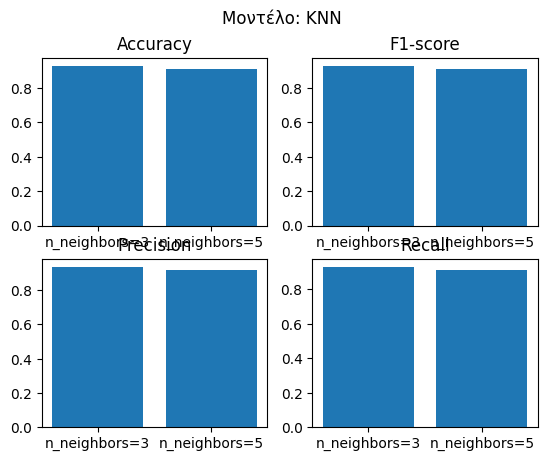

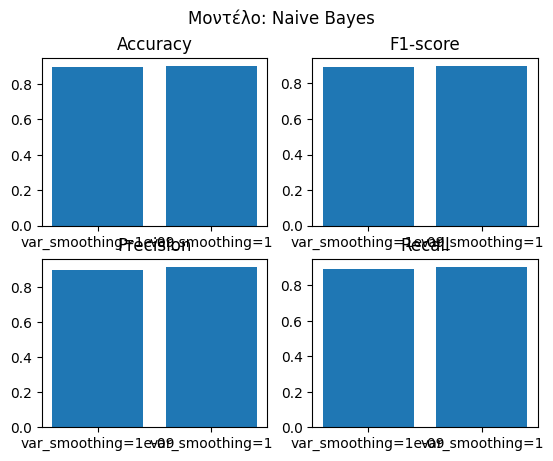

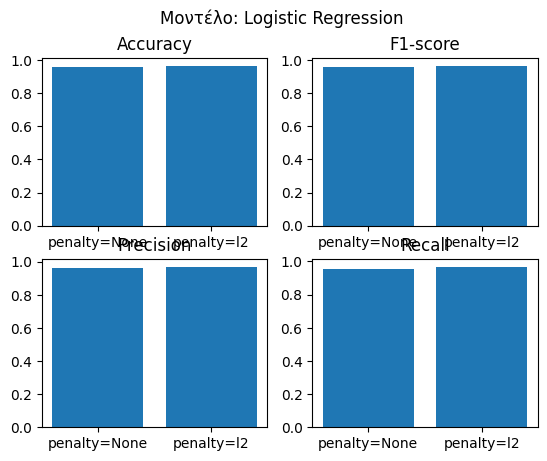



                 Model           Parameters  Accuracy  Precision    Recall  \
0                  KNN        n_neighbors=3  0.929825   0.933041  0.929825   
1                  KNN        n_neighbors=5  0.912281   0.915674  0.912281   
2          Naive Bayes  var_smoothing=1e-09  0.894737   0.896041  0.894737   
3          Naive Bayes      var_smoothing=1  0.903509   0.911437  0.903509   
4  Logistic Regression         penalty=None  0.956140   0.960526  0.956140   
5  Logistic Regression           penalty=l2  0.964912   0.965770  0.964912   

   F1-score  
0  0.930270  
1  0.912838  
2  0.895107  
3  0.901102  
4  0.956470  
5  0.965036  


In [104]:
models = ["KNN", "Naive Bayes", "Logistic Regression"]

for model in models:
    # Φιλτράρισμα των δεδομένων για το συγκεκριμένο μοντέλο
    model_df = metrics_df[metrics_df["Model"].str.contains(model)]

    figure, axis = plt.subplots(2, 2)
    figure.suptitle(f"Μοντέλο: {model}")
    # For Accuracy
    axis[0, 0].bar(model_df['Parameters'], model_df["Accuracy"])
    axis[0, 0].set_title("Accuracy")

    # For F1-Score
    axis[0, 1].bar(model_df['Parameters'], model_df["F1-score"])
    axis[0, 1].set_title("F1-score")

    # For Precision
    axis[1, 0].bar(model_df['Parameters'], model_df["Precision"])
    axis[1, 0].set_title("Precision")

    # For Recall
    axis[1, 1].bar(model_df['Parameters'], model_df["Recall"])
    axis[1, 1].set_title("Recall")

    plt.show()
    print(f"\n")

# Eμφάνισε το dataset με τα metrics
print(metrics_df)

Το μοντέλο με τη μεγαλύτερη ορθότητα (accuracy = 0.965) ήταν το Logistic Regression με penalty=l2.